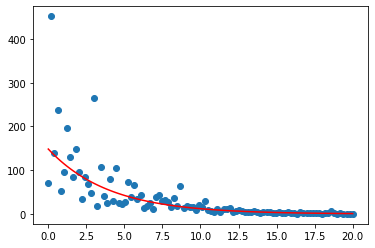

In [1]:
"""
Link
https://towardsdatascience.com/bayesian-price-optimization-with-pymc3-d1264beb38ee

"""
import numpy as np
import matplotlib.pyplot as plt

sd = 0.5
m, b = -0.25, 5
X = np.linspace(0, 20, 100)
Y = np.exp(np.random.normal(loc=m * X + b, scale=sd))

plt.scatter(X, Y)
Y_hat = np.exp(m * X + b)
plt.plot(X, Y_hat, color="r")

/var/folders/nt/tzmkzrps46j70ypk7b5khzlh0000gn/T/ipykernel_21288/2422391112.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(chains=8, tune=2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 4 jobs)
NUTS: [s, b, m]


Sampling 8 chains for 2_000 tune and 1_000 draw iterations (16_000 + 8_000 draws total) took 25 seconds.
The acceptance probability does not match the target. It is 0.8916668287415598, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8790139925323504, but should be close to 0.8. Try to increase the number of tuning steps.


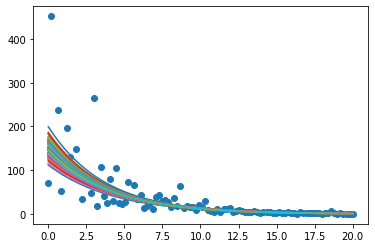

In [8]:
import pymc3 as pm
import random


with pm.Model() as model:
    m = pm.Normal("m", mu=0, sd=2)
    b = pm.Normal("b", mu=0, sd=2)
    s = pm.Exponential("s", lam=1)
    y_hat = pm.math.dot(m, X) + b
    lik = pm.Normal("lik", mu=y_hat, observed=pm.math.log(Y), sigma=s)
    trace = pm.sample(chains=4, tune=2000)


def post_plot(trace_obj=trace, samples=100, size=len(X)):
    for itr in range(samples):
        idx = random.choice(range(size))
        m = trace_obj.get_values("m")[idx]
        b = trace_obj.get_values("b")[idx]
        Y_hat = np.exp(m * X + b)
        plt.plot(X, Y_hat)
    plt.scatter(X, Y)


post_plot()

<AxesSubplot:>

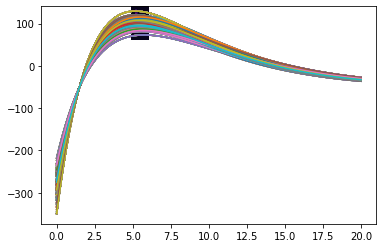

In [9]:
"""
Revenue and Profit
"""
import seaborn as sns


def rev_posterior(samples=100, size=len(X)):
    for s in range(samples):
        idx = random.choice(range(size))
        m = trace.get_values("m")[idx]
        b = trace.get_values("b")[idx]
        rev = X * np.exp(m * X + b)
        plt.plot(X, rev)
    return


# rev_posterior()


@np.vectorize
def cost(X):
    return 1.5 * X + 50


def prof_posterior(samples=100, size=len(X)):
    prices = []
    profits = []
    for s in range(samples):
        idx = random.choice(range(size))
        m = trace.get_values("m")[idx]
        b = trace.get_values("b")[idx]
        demand = np.exp(m * X + b)
        rev = X * demand
        prof = rev - cost(demand)
        plt.plot(X, prof)

        best_price = X[np.argmax(prof)]
        best_prof = np.max(prof)
        prices.append(best_price)
        profits.append(best_prof)
    return prices, profits


prices, profits = prof_posterior(samples=1000)

sns.kdeplot(x=prices, y=profits, cmap="inferno", fill=True, thresh=0)